In [1]:
# import matplotlib.pyplot as plt
# for key, value in plt.rcParams.items():
#     if value == 'black':
#         print(f"{key}: {value}")
#[print(f"{key}: {value}") for key, value in plt.rcParams.items() if value == 'black'];

In [2]:
# updated_params = {key: 'white' if value == 'black' else value for key, value in plt.rcParams.items()}
# plt.rcParams.update(updated_params)
# [print(f"{key}: {value}") for key, value in plt.rcParams.items() if value == 'black'];

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '.1'
plt.rcParams['axes.facecolor'] = '.2'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'

In [4]:
data = pd.read_csv('data\FremontBridge.csv', index_col='Date')
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
08/01/2022 12:00:00 AM,23.0,7.0,16.0
08/01/2022 01:00:00 AM,12.0,5.0,7.0
08/01/2022 02:00:00 AM,3.0,0.0,3.0
08/01/2022 03:00:00 AM,5.0,2.0,3.0
08/01/2022 04:00:00 AM,10.0,2.0,8.0


In [5]:
data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [6]:
data.columns = ['Total', 'East', 'West']

In [7]:
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [8]:
data.dropna().describe()

,Total,East,West
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


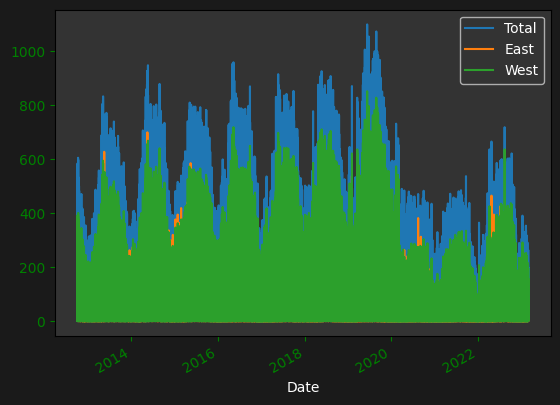

In [9]:
#hourly count is way to dense to plot it like this (this is a line plot right?)
data.plot();

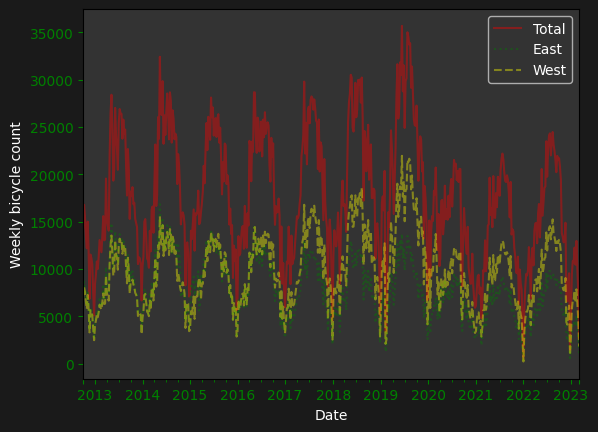

In [10]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'], alpha=.4, color=['red','green','yellow'])
plt.ylabel('Weekly bicycle count');

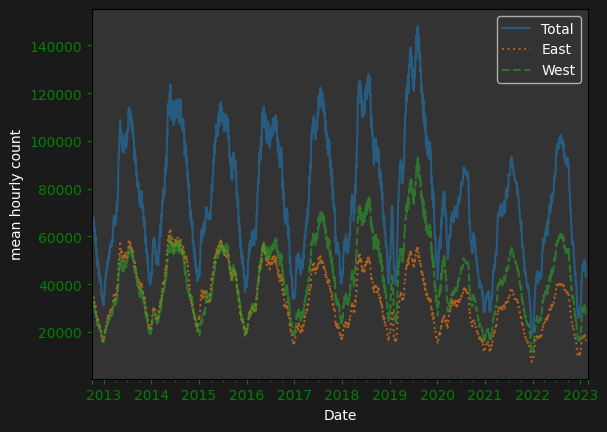

In [11]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'], alpha=.6)
plt.ylabel('mean hourly count');

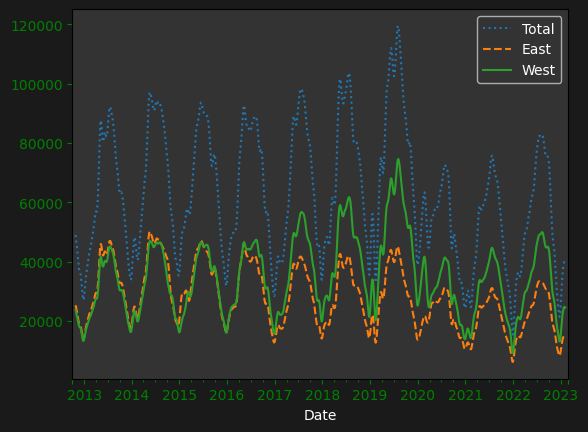

In [12]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

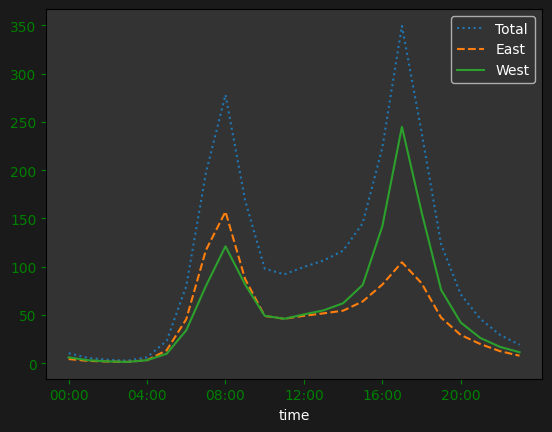

In [14]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [15]:
by_time

,Total,East,West
00:00:00,10.304920,4.279400,6.025520
01:00:00,5.441200,2.387793,3.053407
02:00:00,3.557373,1.679240,1.878132
03:00:00,2.628256,1.309918,1.318337
04:00:00,6.170745,3.061037,3.109708
05:00:00,23.137858,13.374638,9.763220
06:00:00,79.753749,45.564062,34.189687
07:00:00,196.993686,117.041568,79.952118
08:00:00,278.153907,157.024730,121.129177
09:00:00,168.881579,87.277632,81.603947


In [16]:
data.groupby(data.index.date).mean()

,Total,East,West
2012-10-03,146.708333,73.333333,73.375000
2012-10-04,144.791667,71.166667,73.625000
2012-10-05,131.166667,64.916667,66.250000
2012-10-06,83.583333,45.000000,38.583333
2012-10-07,89.250000,49.625000,39.625000
...,...,...,...
2023-02-24,48.041667,17.708333,30.333333
2023-02-25,35.666667,15.541667,20.125000
2023-02-26,37.333333,15.416667,21.916667
2023-02-27,50.375000,16.666667,33.708333


In [17]:
data.groupby(data.index.to_period('W')).mean()

,Total,East,West
Date,,,
2012-10-01/2012-10-07,119.100000,60.808333,58.291667
2012-10-08/2012-10-14,99.970238,51.660714,48.309524
2012-10-15/2012-10-21,92.315476,47.297619,45.017857
2012-10-22/2012-10-28,79.982143,41.077381,38.904762
2012-10-29/2012-11-04,72.583333,38.142857,34.440476
...,...,...,...
2023-01-30/2023-02-05,62.315476,23.803571,38.511905
2023-02-06/2023-02-12,77.244048,30.458333,46.785714
2023-02-13/2023-02-19,60.380952,22.244048,38.136905


In [18]:
data.groupby(data.index.to_period('Y')).mean()

,Total,East,West
Date,,,
2012,70.699537,36.312037,34.387500
2013,106.004225,54.698070,51.306155
2014,114.875671,58.833885,56.041786
2015,112.659130,57.201667,55.457463
2016,111.860412,53.319367,58.541045
2017,109.959470,47.094988,62.864482
2018,120.091335,48.596301,71.495034
2019,135.534422,51.359059,84.175362
2020,87.964591,36.877491,51.087100


In [19]:
data.resample('Y').mean()

,Total,East,West
Date,,,
2012-12-31,70.699537,36.312037,34.387500
2013-12-31,106.004225,54.698070,51.306155
2014-12-31,114.875671,58.833885,56.041786
2015-12-31,112.659130,57.201667,55.457463
2016-12-31,111.860412,53.319367,58.541045
2017-12-31,109.959470,47.094988,62.864482
2018-12-31,120.091335,48.596301,71.495034
2019-12-31,135.534422,51.359059,84.175362
2020-12-31,87.964591,36.877491,51.087100


In [20]:
data.resample('D').mean()

,Total,East,West
Date,,,
2012-10-03,146.708333,73.333333,73.375000
2012-10-04,144.791667,71.166667,73.625000
2012-10-05,131.166667,64.916667,66.250000
2012-10-06,83.583333,45.000000,38.583333
2012-10-07,89.250000,49.625000,39.625000
...,...,...,...
2023-02-24,48.041667,17.708333,30.333333
2023-02-25,35.666667,15.541667,20.125000
2023-02-26,37.333333,15.416667,21.916667


In [21]:
data['Total'].sort_index().iloc[:24].mean()

146.70833333333334

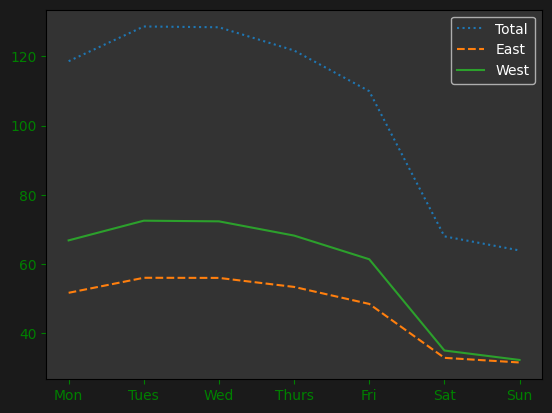

In [22]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [23]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

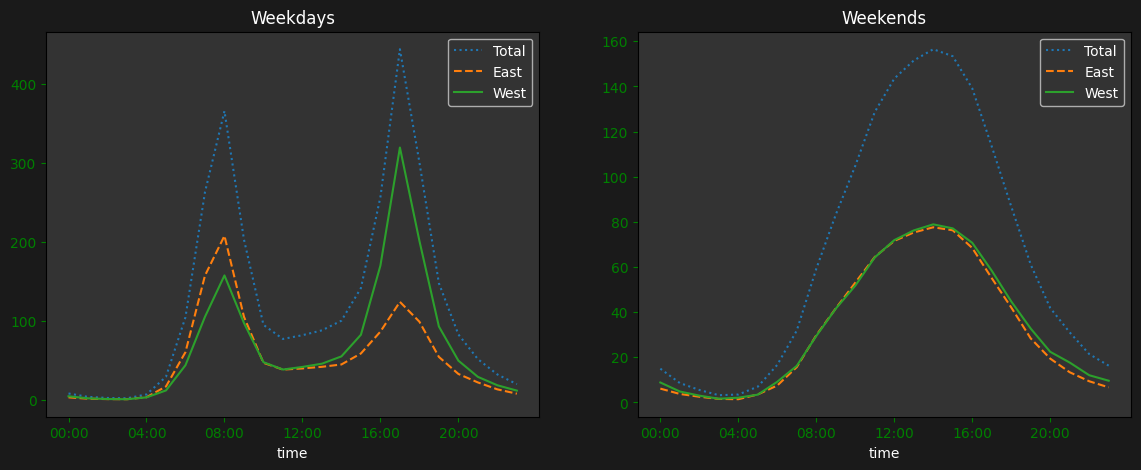

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);